# Maximal Lyapunov Exponents (MLE)

https://en.wikipedia.org/wiki/Lyapunov_exponent

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
start = '2021-01-01'
end = '2022-01-01'
symbol = 'ITC.NS'

In [3]:
df = yf.download(symbol, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01 00:00:00+05:30,209.899994,214.199997,209.300003,213.850006,191.089066,19527333
2021-01-04 00:00:00+05:30,214.000000,216.000000,212.100006,213.399994,190.686935,26891799
2021-01-05 00:00:00+05:30,212.449997,213.250000,210.600006,211.449997,188.944489,18024083
2021-01-06 00:00:00+05:30,211.449997,211.500000,204.500000,205.399994,183.538406,49067837
2021-01-07 00:00:00+05:30,206.100006,207.600006,202.100006,202.800003,181.215134,34952401


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-27 00:00:00+05:30,218.399994,218.449997,215.649994,217.550003,204.537384,8153106
2021-12-28 00:00:00+05:30,218.000000,220.600006,218.000000,220.050003,206.887863,11568803
2021-12-29 00:00:00+05:30,220.000000,220.300003,216.300003,216.750000,203.785248,11480954
2021-12-30 00:00:00+05:30,216.600006,217.899994,215.500000,216.000000,203.080124,9741198
2021-12-31 00:00:00+05:30,216.899994,218.800003,216.149994,218.050003,205.007492,7583815


In [6]:
df['Returns'] = df['Adj Close'].pct_change()
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2021-01-04 00:00:00+05:30,214.000000,216.000000,212.100006,213.399994,190.686935,26891799,-0.002104
2021-01-05 00:00:00+05:30,212.449997,213.250000,210.600006,211.449997,188.944489,18024083,-0.009138
2021-01-06 00:00:00+05:30,211.449997,211.500000,204.500000,205.399994,183.538406,49067837,-0.028612
2021-01-07 00:00:00+05:30,206.100006,207.600006,202.100006,202.800003,181.215134,34952401,-0.012658
2021-01-08 00:00:00+05:30,204.350006,206.000000,200.250000,201.500000,180.053528,56427360,-0.006410


In [7]:
R = df['Returns']
LE = []
result = []

for r in R:
  x = np.random.random()
  for n in range(100):
    x = r*x*(1-x)
  result = []

  for n in range(100):
    x = r * x * (1-x)
    result.append(np.log(abs(r-2*r*x)))
  LE.append(np.mean(result))

In [8]:
LE

[-6.163719175000298,
 -4.695342612343026,
 -3.5539286159806935,
 -4.369447104236431,
 -5.049881520968903,
 -5.305819000499574,
 -3.937015088240167,
 -3.761447791828423,
 -4.2883322010077265,
 -4.058337862992587,
 -4.741956420562509,
 -5.497844589545288,
 -5.2060490308669145,
 -4.0091764391657305,
 -4.265961955076024,
 -4.285725288075526,
 -4.289263583562501,
 -3.951493510291223,
 -4.1218113699758785,
 -2.7728337434618955,
 -4.564121587622019,
 -5.0138491835243855,
 -2.798527297253597,
 -3.95625430499473,
 -5.233657384157865,
 -4.0404805312358585,
 -5.062159123385241,
 -5.332056748087316,
 -3.225300650901375,
 -5.242219482973318,
 -6.437078120859046,
 -6.0788008158159705,
 -5.288034381057587,
 -4.323676534272237,
 -3.9906452139814066,
 -4.9613932642818925,
 -6.389811935518571,
 -6.545623892706118,
 -3.6753460525995116,
 -4.20224662426699,
 -4.233619095629686,
 -8.342175887494676,
 -6.733109631232114,
 -5.205931417309686,
 -5.937979901417712,
 -6.947038547523008,
 -5.074203854764556,
 -5

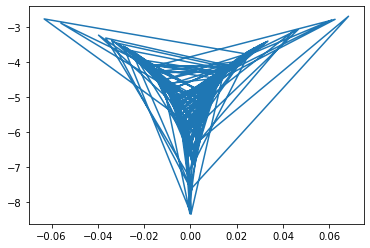

In [9]:
plt.plot(R, LE)
plt.show()

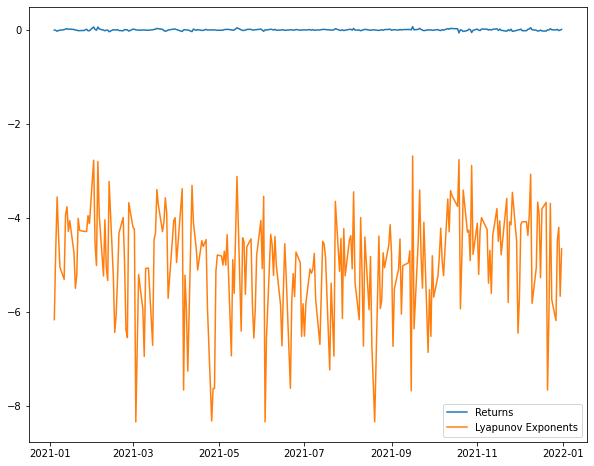

In [10]:
plt.figure(figsize=(10,8))
plt.plot(df.index, df['Returns'], label = 'Returns')
plt.plot(df.index, LE, label = 'Lyapunov Exponents')
plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'Lyapunov Exponents')

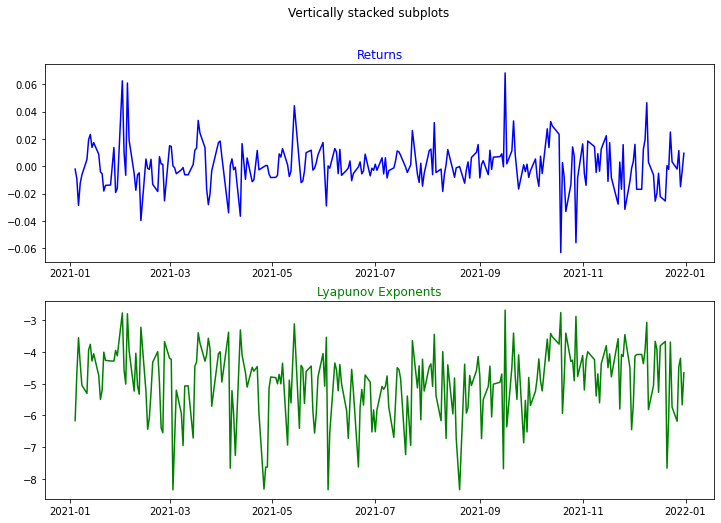

In [11]:
fig, axs = plt.subplots(2)
fig.set_size_inches(12, 8)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(df.index, df['Returns'], c='b')
axs[0].set_title('Returns', c='b')
axs[1].plot(df.index, LE, c='g')
axs[1].set_title('Lyapunov Exponents', c='g')